In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('synthetic_loan_data.csv')

In [4]:
df.head()

,customer_id,loan_id,loan_amount,loan_start_date,loan_term_months,loan_purpose,loan_status,outstanding_balance,monthly_installment,interest_rate,...,other_income,credit_score,num_of_open_accounts,num_of_past_defaults,avg_monthly_balance,months_with_bank,num_direct_debits,num_card_txns_6m,payment_delay_days,last_payment_date
0,100000,500000,453468,2023-01-22,12,Personal,Defaulted,430342,44383,17.45,...,8297,549,4,1,73780,95,4,26,165,2025-01-15
1,100001,500001,467924,2022-05-19,36,Business,Defaulted,459055,14301,10.03,...,7786,691,5,0,72061,46,7,24,173,2023-11-06
2,100002,500002,301940,2021-12-17,24,Medical,Paid,296209,13846,10.06,...,9062,701,4,0,128888,64,8,24,16,2022-11-16
3,100003,500003,311508,2018-07-21,48,Business,Defaulted,308132,7861,21.14,...,4167,448,4,0,97225,23,1,24,117,2019-12-16
4,100004,500004,323632,2019-04-27,48,Business,Defaulted,318738,8191,21.50,...,7228,464,3,2,5000,72,1,25,121,2020-12-24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           30000 non-null  int64  
 1   loan_id               30000 non-null  int64  
 2   loan_amount           30000 non-null  int64  
 3   loan_start_date       30000 non-null  object 
 4   loan_term_months      30000 non-null  int64  
 5   loan_purpose          30000 non-null  object 
 6   loan_status           30000 non-null  object 
 7   outstanding_balance   30000 non-null  int64  
 8   monthly_installment   30000 non-null  int64  
 9   interest_rate         30000 non-null  float64
 10  application_date      30000 non-null  object 
 11  approval_date         30000 non-null  object 
 12  age                   30000 non-null  int64  
 13  gender                30000 non-null  object 
 14  marital_status        30000 non-null  object 
 15  education_level    

In [6]:
# Convert dates
date_cols = [
    'loan_start_date', 'application_date', 'approval_date', 'last_payment_date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Summary
print(df.head())
print(df.describe(include='all'))
print(df.isnull().sum())


   customer_id  loan_id  loan_amount loan_start_date  loan_term_months  \
0       100000   500000       453468      2023-01-22                12   
1       100001   500001       467924      2022-05-19                36   
2       100002   500002       301940      2021-12-17                24   
3       100003   500003       311508      2018-07-21                48   
4       100004   500004       323632      2019-04-27                48   

  loan_purpose loan_status  outstanding_balance  monthly_installment  \
0     Personal   Defaulted               430342                44383   
1     Business   Defaulted               459055                14301   
2      Medical        Paid               296209                13846   
3     Business   Defaulted               308132                 7861   
4     Business   Defaulted               318738                 8191   

   interest_rate  ... other_income credit_score  num_of_open_accounts  \
0          17.45  ...         8297          549  

In [7]:
import pandas as pd

# Convert dates
date_cols = [
    "loan_start_date", "application_date", "approval_date", "last_payment_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Standardize string columns (strip & lower)
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    df[col] = df[col].str.strip()


In [8]:
# approval should come after application
invalid_1 = (df['approval_date'] < df['application_date']).sum()

# loan start should not be BEFORE approval
invalid_2 = (df['loan_start_date'] < df['approval_date']).sum()

# last payment date can't be before loan start
invalid_3 = (df['last_payment_date'] < df['loan_start_date']).sum()

# outstanding balance should be less or equal to loan amount
invalid_4 = (df['outstanding_balance'] > df['loan_amount']).sum()

print("Approval before application:", invalid_1)
print("Loan start before approval:", invalid_2)
print("Last payment before loan start:", invalid_3)
print("Outstanding balance > loan amount:", invalid_4)


Approval before application: 0
Loan start before approval: 0
Last payment before loan start: 0
Outstanding balance > loan amount: 0


In [9]:
print("Age range:", df['age'].min(), df['age'].max())
print("Credit Score range:", df['credit_score'].min(), df['credit_score'].max())
print("Income range:", df['annual_income'].min(), df['annual_income'].max())
print("Num past defaults range:", df['num_of_past_defaults'].min(), df['num_of_past_defaults'].max())


Age range: 21 65
Credit Score range: 300 850
Income range: 120000 2088624
Num past defaults range: 0 2


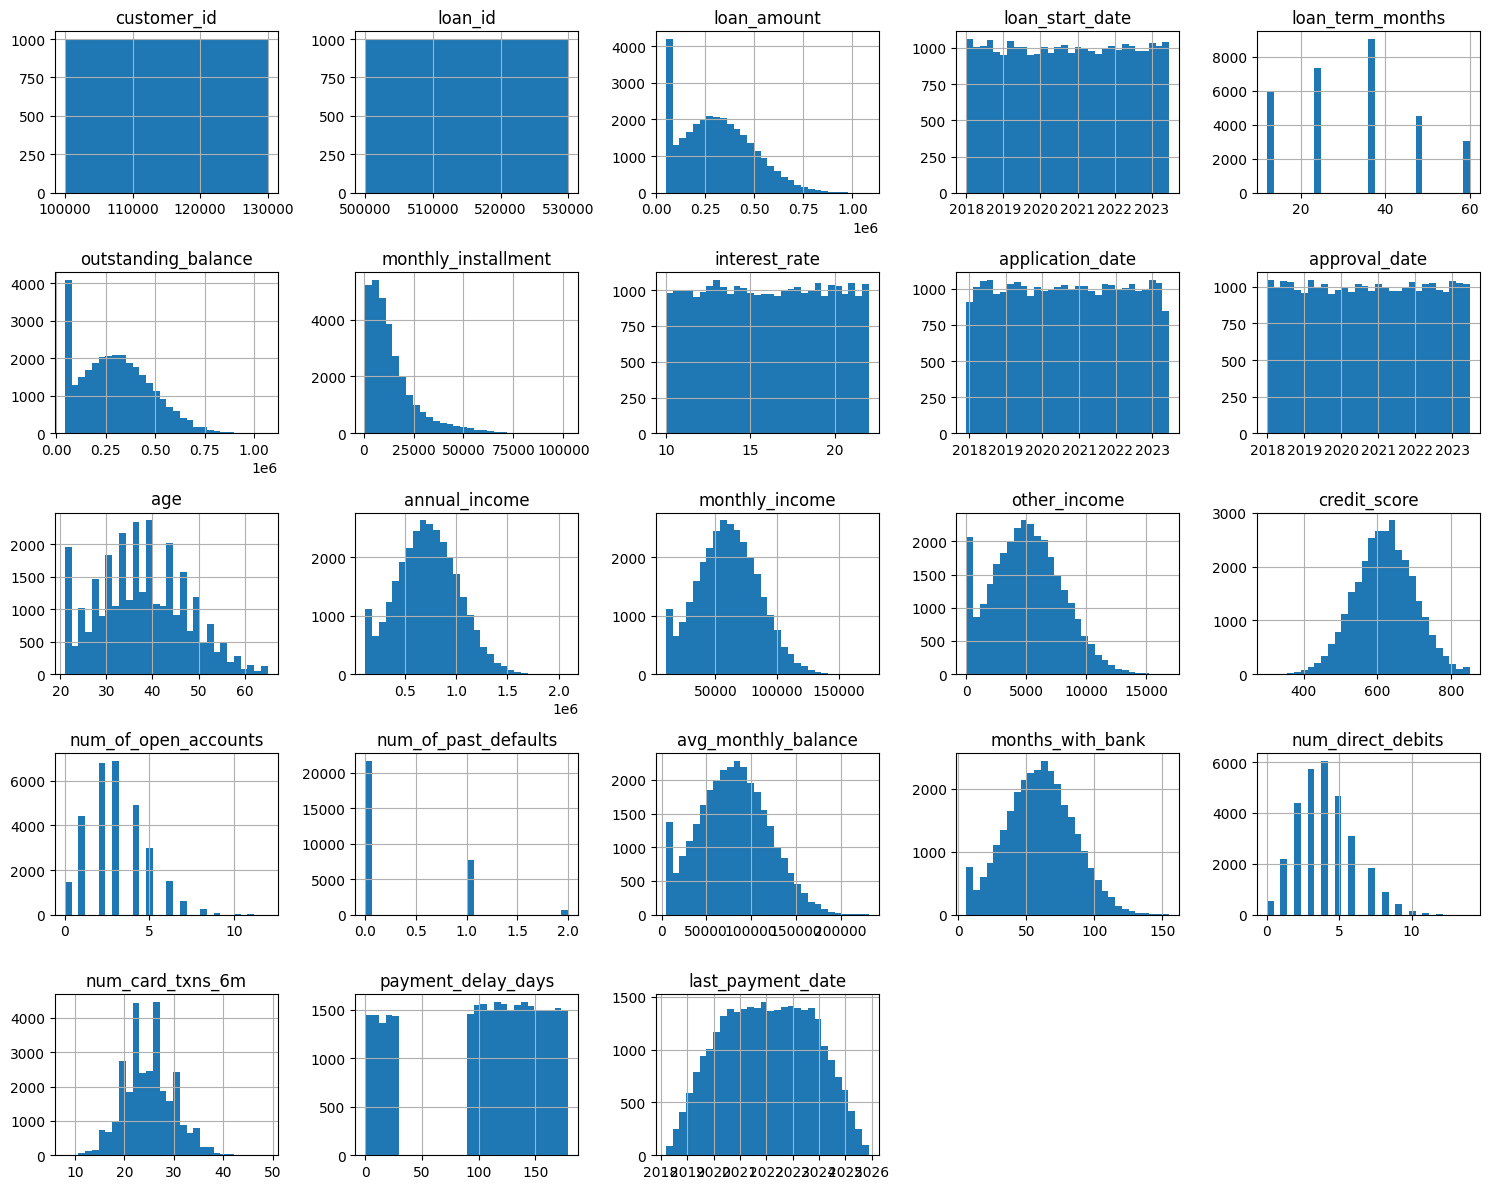

In [10]:
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()


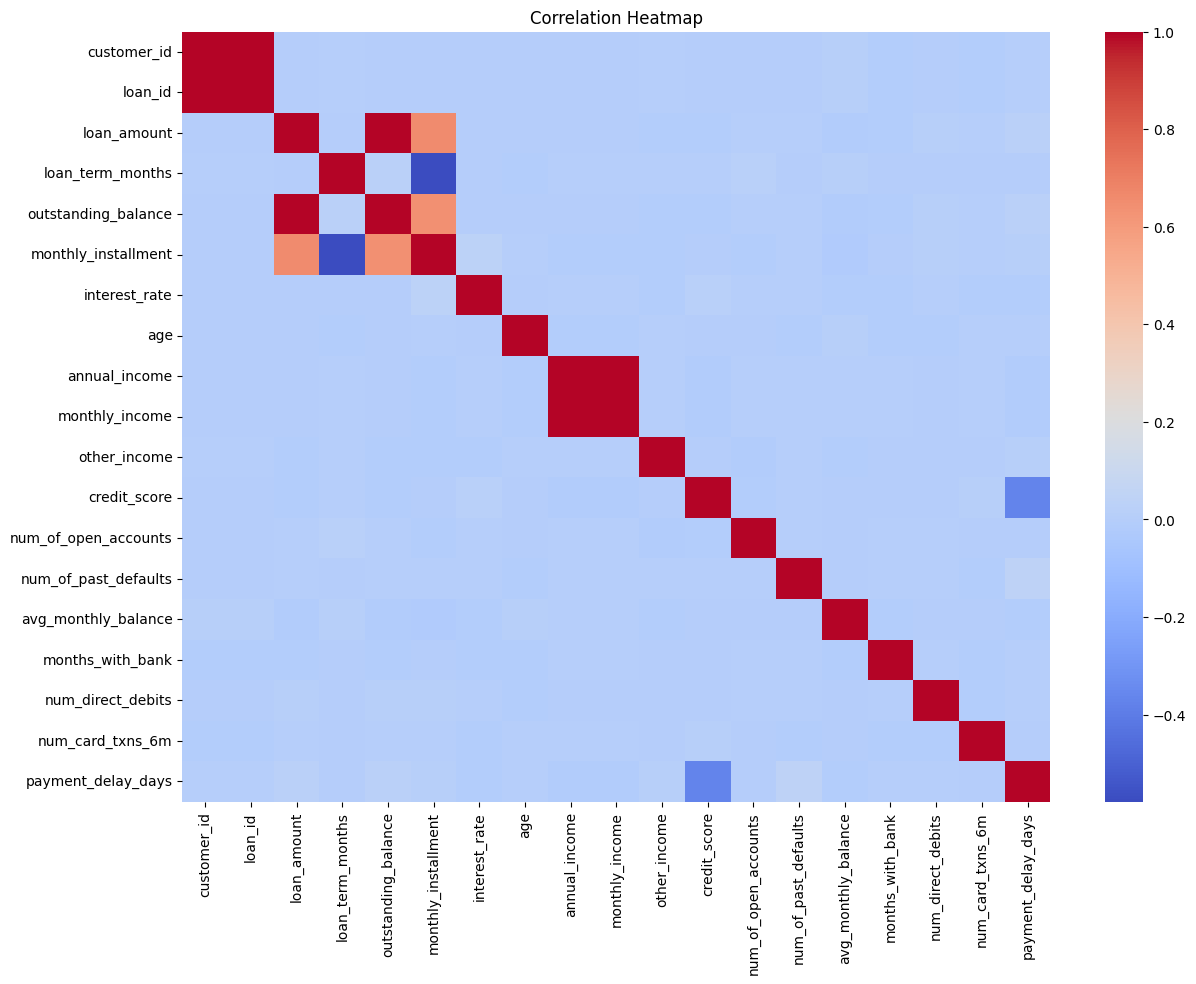

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
cat_cols = ['gender', 'marital_status', 'education_level',
            'employment_status', 'loan_purpose', 'loan_status']

for col in cat_cols:
    print("\nVALUE COUNTS FOR:", col)
    print(df[col].value_counts())



VALUE COUNTS FOR: gender
gender
Male      16468
Female    13532
Name: count, dtype: int64

VALUE COUNTS FOR: marital_status
marital_status
Married     13638
Single      13422
Divorced     2940
Name: count, dtype: int64

VALUE COUNTS FOR: education_level
education_level
High School    10532
Bachelors       9008
Diploma         7561
Masters         2899
Name: count, dtype: int64

VALUE COUNTS FOR: employment_status
employment_status
Employed         20780
Self-employed     6113
Unemployed        3107
Name: count, dtype: int64

VALUE COUNTS FOR: loan_purpose
loan_purpose
Personal            11893
Business             7539
Education            4512
Medical              3041
Home Improvement     3015
Name: count, dtype: int64

VALUE COUNTS FOR: loan_status
loan_status
Defaulted    22862
Paid          7138
Name: count, dtype: int64


In [13]:
df.describe(include='all')


,customer_id,loan_id,loan_amount,loan_start_date,loan_term_months,loan_purpose,loan_status,outstanding_balance,monthly_installment,interest_rate,...,other_income,credit_score,num_of_open_accounts,num_of_past_defaults,avg_monthly_balance,months_with_bank,num_direct_debits,num_card_txns_6m,payment_delay_days,last_payment_date
count,30000.000000,30000.000000,3.000000e+04,30000,30000.00000,30000,30000,3.000000e+04,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000
unique,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Personal,Defaulted,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11893,22862,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,114999.500000,514999.500000,3.087997e+05,2020-09-25 13:54:02.880000256,32.51280,NaN,NaN,3.016434e+05,14362.167467,16.011060,...,5061.589700,618.830100,2.995033,0.299933,80317.225233,59.833767,4.002267,25.016967,105.841533,2022-01-19 23:38:44.160000256
min,100000.000000,500000.000000,5.000000e+04,2018-01-01 00:00:00,12.00000,NaN,NaN,4.547200e+04,916.000000,10.000000,...,0.000000,300.000000,0.000000,0.000000,5000.000000,6.000000,0.000000,8.000000,0.000000,2018-03-12 00:00:00
25%,107499.750000,507499.750000,1.642722e+05,2019-05-12 00:00:00,24.00000,NaN,NaN,1.606038e+05,5542.750000,13.010000,...,2984.000000,565.000000,2.000000,0.000000,52566.250000,43.000000,3.000000,22.000000,91.000000,2020-09-04 00:00:00
50%,114999.500000,514999.500000,2.980480e+05,2020-09-24 00:00:00,36.00000,NaN,NaN,2.909445e+05,10771.500000,16.010000,...,4989.500000,619.000000,3.000000,0.000000,80037.000000,60.000000,4.000000,25.000000,120.000000,2022-01-20 00:00:00
75%,122499.250000,522499.250000,4.328775e+05,2022-02-13 00:00:00,48.00000,NaN,NaN,4.226040e+05,18639.500000,19.030000,...,7014.000000,673.000000,4.000000,1.000000,106799.750000,77.000000,5.000000,28.000000,149.000000,2023-06-10 00:00:00
max,129999.000000,529999.000000,1.082720e+06,2023-06-23 00:00:00,60.00000,NaN,NaN,1.067855e+06,102387.000000,22.000000,...,16930.000000,850.000000,12.000000,2.000000,231212.000000,155.000000,14.000000,49.000000,179.000000,2025-11-21 00:00:00


## 📌 STEP 3 — Univariate EDA

📌 STEP 3 — Univariate EDA

<Axes: xlabel='loan_status'>

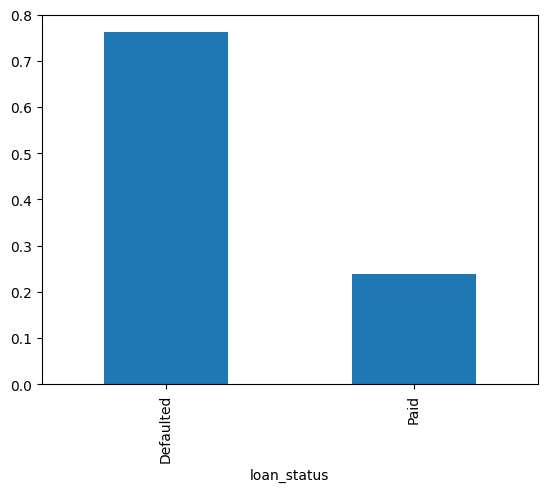

In [14]:
#Target variable distribution
df['loan_status'].value_counts(normalize=True).plot(kind='bar')


<Axes: ylabel='Frequency'>

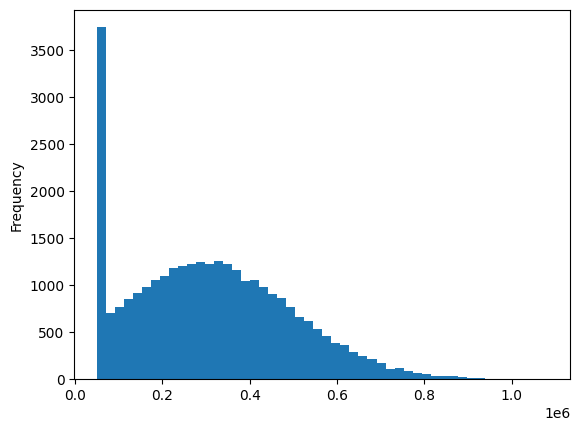

In [15]:
# Loan amount distribution
df['loan_amount'].plot(kind='hist', bins=50)


<Axes: ylabel='Frequency'>

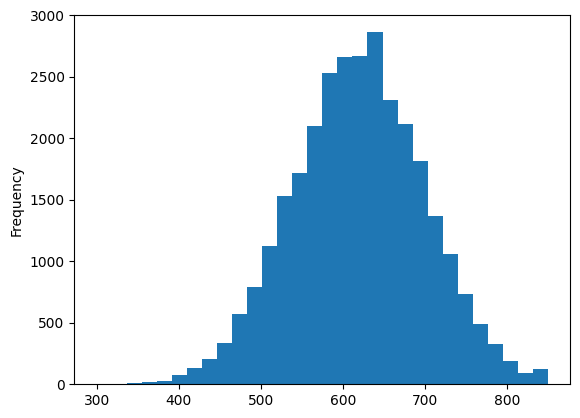

In [16]:
# Credit score distribution
df['credit_score'].plot(kind='hist', bins=30)


<Axes: ylabel='Frequency'>

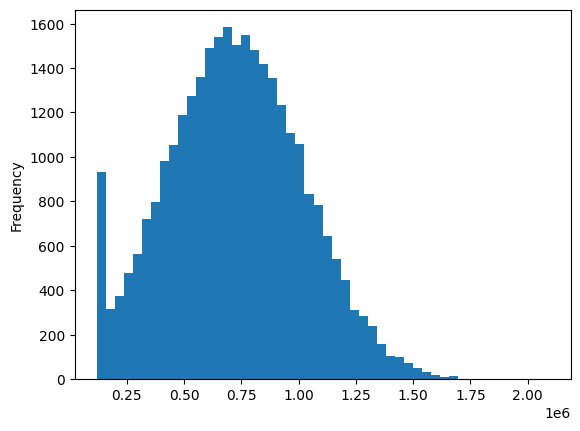

In [17]:
# Income distribution
df['annual_income'].plot(kind='hist', bins=50)


## 📌 STEP 4 — Bivariate EDA (Most important for loan defaults)

In [18]:
# Default rate by loan purpose
df.groupby('loan_purpose')['loan_status'].value_counts(normalize=True).unstack()


loan_status,Defaulted,Paid
loan_purpose,,
Business,0.764027,0.235973
Education,0.753989,0.246011
Home Improvement,0.753897,0.246103
Medical,0.773101,0.226899
Personal,0.763138,0.236862


In [19]:
# Default rate vs credit score
df[['credit_score','loan_status']].groupby('loan_status').mean()


,credit_score
loan_status,
Defaulted,600.549514
Paid,677.380219


In [20]:
# Default vs payment delay
df[['payment_delay_days','loan_status']].groupby('loan_status').mean()


,payment_delay_days
loan_status,
Defaulted,134.373239
Paid,14.458532


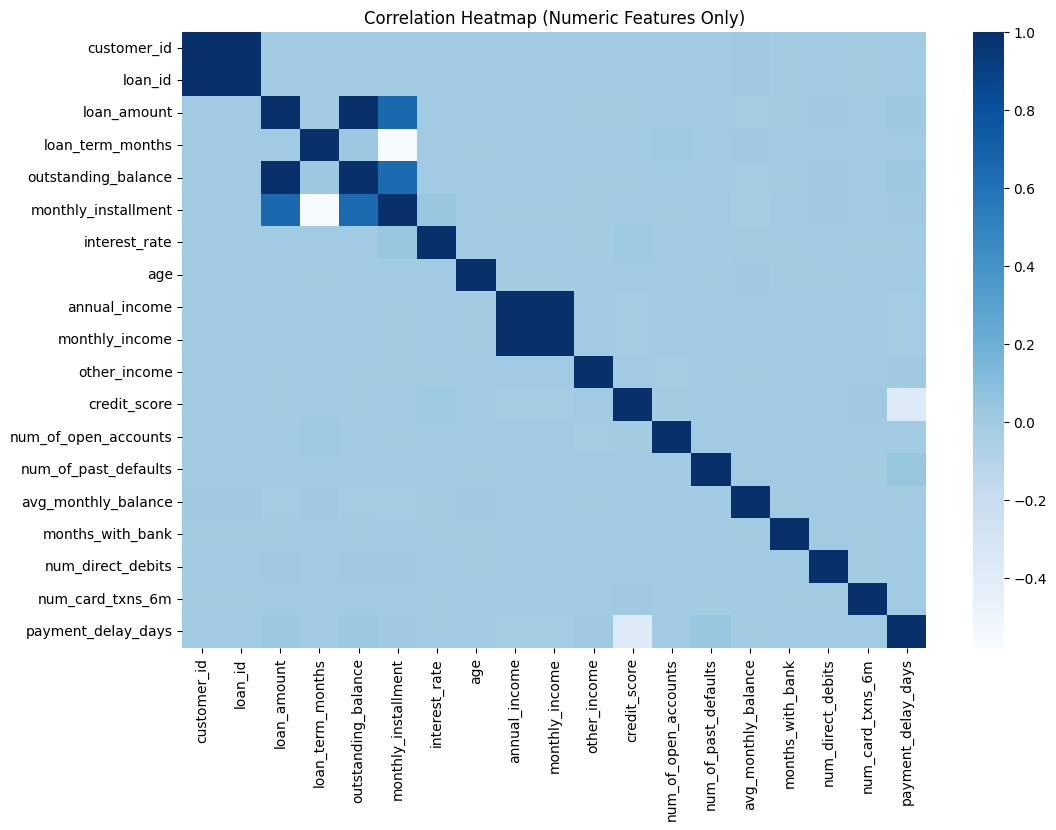

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="Blues")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


## 📌 STEP 5 — Logical Consistency Checks

In [22]:
# Outstanding balance greater than loan amount
df[df['outstanding_balance'] > df['loan_amount']].shape


(0, 29)

In [23]:
# Approval date earlier than application date
df[df['approval_date'] < df['application_date']].shape


(0, 29)

In [24]:
# Negative or zero incomes
df[(df['annual_income'] <= 0) | (df['monthly_income'] <= 0)].shape


(0, 29)

In [25]:
# Zero or unrealistic credit scores
df[(df['credit_score'] < 300) | (df['credit_score'] > 850)].shape


(0, 29)

## 📌 STEP 6 — Class Imbalance Check

In [26]:
imbalance = df['loan_status'].value_counts(normalize=True)
imbalance


loan_status
Defaulted    0.762067
Paid         0.237933
Name: proportion, dtype: float64

In [27]:
# ===============================
# 0. Imports & Setup
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve,
    average_precision_score, classification_report, confusion_matrix
)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # to integrate SMOTE cleanly

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)


In [28]:
# ===============================
# 2. Feature Engineering (domain features)
# ===============================
# Create domain features that a bank would use at origination/approval

# 2.1 loan_to_income ratio
df['loan_to_income'] = df['loan_amount'] / (df['monthly_income'] + 1)  # monthly basis

# 2.2 installment_ratio: installment relative to monthly income
df['installment_ratio'] = df['monthly_installment'] / (df['monthly_income'] + 1)

# 2.3 collateral coverage – not available; we skip it
# 2.4 account age (months) already available as 'months_with_bank'
# 2.5 active_card_usage: derived indicator
df['card_txns_per_month'] = df['num_card_txns_6m'] / 6.0

# 2.6 loan_age_days at time of modeling (if predicting at origination, this is 0; otherwise use)
# We'll set loan_age_days = 0 (predict at origination), but keep loan_start_date for time split
df['loan_age_days'] = 0

# 2.7 Binning credit score (optional) for interpretability
df['credit_band'] = pd.cut(df['credit_score'], bins=[299,549,629,699,759,851],
                           labels=['VeryHighRisk','HighRisk','Medium','Low','VeryLowRisk'])


In [30]:
# ===============================
# 3. Select features for modeling
# ===============================
# Choose features that are available at origination (no post-payment leakage).
features = [
    'loan_amount', 'loan_term_months', 'interest_rate',
    'loan_purpose', 'age', 'gender', 'marital_status',
    'education_level', 'employment_status',
    'annual_income', 'monthly_income', 'other_income',
    'credit_score', 'num_of_open_accounts', 'num_of_past_defaults',
    'avg_monthly_balance', 'months_with_bank', 'num_direct_debits',
    'card_txns_per_month', 'loan_to_income', 'installment_ratio', 'credit_band'
]

# quick check
missing_feats = [f for f in features if f not in df.columns]
if missing_feats:
    print("Missing features:", missing_feats)

X = df[features].copy()
y = df['target'].copy()


In [31]:
# Create target column from loan_status
df['target'] = df['loan_status'].map({'Defaulted': 1, 'Paid': 0})

# Verify it worked
print(df['target'].value_counts())

# Check for missing features
missing_feats = [c for c in features if c not in df.columns]
print("Missing features:", missing_feats)

# Feature and label split
X = df[features].copy()
y = df['target'].copy()


target
1    22862
0     7138
Name: count, dtype: int64
Missing features: []


In [32]:
# ===============================
# 4. Time-aware train/test split (recommended for credit models)
# ===============================
# We'll split on loan_start_date to avoid lookahead leakage. Choose a cutoff.
split_date = pd.to_datetime('2022-01-01')

train_mask = df['loan_start_date'] < split_date
test_mask  = df['loan_start_date'] >= split_date

X_train = X[train_mask].reset_index(drop=True)
y_train = y[train_mask].reset_index(drop=True)
X_test  = X[test_mask].reset_index(drop=True)
y_test  = y[test_mask].reset_index(drop=True)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train default rate:", y_train.mean(), "Test default rate:", y_test.mean())


Train size: (21872, 22) Test size: (8128, 22)
Train default rate: 0.7616587417702999 Test default rate: 0.7631643700787402


In [33]:
# ===============================
# 5. Preprocessing pipelines
# ===============================
# Numerical columns
num_cols = [
    'loan_amount','loan_term_months','interest_rate',
    'age','annual_income','monthly_income','other_income',
    'credit_score','num_of_open_accounts','num_of_past_defaults',
    'avg_monthly_balance','months_with_bank','num_direct_debits',
    'card_txns_per_month','loan_to_income','installment_ratio'
]

# Categorical columns
cat_cols = ['loan_purpose','gender','marital_status','education_level','employment_status','credit_band']

# Build transform pipelines
# Build transform pipelines
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
], remainder='drop', verbose_feature_names_out=False)

In [34]:
# ===============================
# 6. SMOTE + Random Forest pipeline
# ===============================

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

pipeline = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('clf', rf)
])

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)



ROC-AUC: 0.7632
PR-AUC (avg precision): 0.9037

Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0     0.5633    0.3351    0.4202      1925
           1     0.8167    0.9194    0.8650      6203

    accuracy                         0.7810      8128
   macro avg     0.6900    0.6272    0.6426      8128
weighted avg     0.7567    0.7810    0.7597      8128



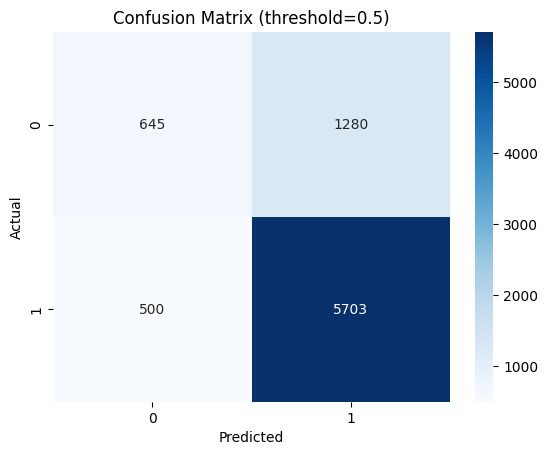

In [35]:
# ===============================
# 7. Evaluation: ROC-AUC, PR-AUC, Classification report
# ===============================
roc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("ROC-AUC:", round(roc,4))
print("PR-AUC (avg precision):", round(pr_auc,4))
print("\nClassification report (threshold=0.5):")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (threshold=0.5)')
plt.show()


In [36]:
# ===============================
# 8. KS statistic (common in credit risk)
# ===============================
def ks_stat(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    ks = max(tpr - fpr)
    return ks

ks = ks_stat(y_test, y_pred_proba)
print("KS statistic:", round(ks,4))


KS statistic: 0.402


In [37]:
# ============================================
# 9. Proper Probability Calibration Pipeline
# ============================================

from sklearn.calibration import CalibratedClassifierCV

from sklearn.calibration import CalibratedClassifierCV

# 1. Preprocess X (no SMOTE)
preproc_X_train = preprocessor.fit_transform(X_train)
preproc_X_test  = preprocessor.transform(X_test)

# 2. Train an uncalibrated RF
rf_uncalibrated = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_uncalibrated.fit(preproc_X_train, y_train)

# 3. Calibrate with isotonic regression
calib_model = CalibratedClassifierCV(
    estimator=rf_uncalibrated,
    method="isotonic",
    cv=5
)

# 4. Fit calibration
calib_model.fit(preproc_X_train, y_train)

# 5. Get calibrated probabilities
calibrated_proba = calib_model.predict_proba(preproc_X_test)[:, 1]

# 6. Compare performance
print("ROC-AUC before calibration:", round(roc_auc_score(y_test, y_pred_proba),4))
print("ROC-AUC after calibration :", round(roc_auc_score(y_test, calibrated_proba),4))


ROC-AUC before calibration: 0.7632
ROC-AUC after calibration : 0.7673


In [44]:
# ===============================
# 10. Map PD -> Score (simple scorecard style)
# ===============================
# Basic logistic-score transformation:
# Score = Offset + Factor * log(odds)
# Choose Factor and Offset to map PD range to ~300-850 score

eps = 1e-10
odds = calibrated_proba / (1 - calibrated_proba + eps)
# Choose two anchor points to set Factor and Offset (example)
# Suppose PD = 0.5 -> score 350, PD = 0.01 -> score 800
pd1, s1 = 0.5, 350
pd2, s2 = 0.01, 800
f = (s2 - s1) / (np.log(pd2/(1-pd2)+eps) - np.log(pd1/(1-pd1)+eps))
offset = s1 - f * np.log(pd1/(1-pd1)+eps)

scores = offset + f * np.log(odds + eps)
scores = np.clip(scores, 300, 900)

# Append results to a small df for analysis
results = X_test.copy()
results['y_true'] = y_test.values
results['pd_raw'] = y_pred_proba
results['pd_calib'] = calibrated_proba
results['score'] = scores

results[['pd_calib','score']].describe()


,pd_calib,score
count,8128.000000,8128.000000
mean,0.764968,312.334769
std,0.175981,35.839977
min,0.041349,300.000000
25%,0.677657,300.000000
50%,0.820256,300.000000
75%,0.890892,300.000000
max,0.995050,657.841533


In [45]:
# ===============================
# 11. Create risk bands & show default rates per band
# ===============================
# Example buckets
bins = [300, 450, 550, 650, 750, 900]
labels = ['Very High','High','Medium','Low','Very Low']
results['risk_band'] = pd.cut(results['score'], bins=bins, labels=labels)

band_summary = results.groupby('risk_band').agg(
    n = ('y_true','count'),
    defaults = ('y_true','sum'),
    avg_pd = ('pd_calib','mean'),
    avg_score = ('score','mean')
).reset_index()

band_summary['default_rate'] = band_summary['defaults'] / band_summary['n']
band_summary


,risk_band,n,defaults,avg_pd,avg_score,default_rate
0,Very High,1422,704,0.498584,351.029330,0.495077
1,High,129,35,0.211711,480.879431,0.271318
2,Medium,14,3,0.084934,585.857710,0.214286
3,Low,1,0,0.041349,657.841533,0.000000
4,Very Low,0,0,NaN,NaN,NaN


In [46]:
# ===============================
# 12. Business Impact: Expected Loss calculation & targeted intervention simulation
# ===============================
# We'll assume:
LGD = 0.6  # Loss Given Default (60% assumed)
# EAD: use outstanding_balance from df (we dropped it from X earlier); pull original outstanding value
EAD_test = df.loc[test_mask, 'outstanding_balance'].reset_index(drop=True)

# expected loss per account = PD * LGD * EAD
expected_loss = (results['pd_calib'] * LGD * EAD_test).sum()
print("Model-based expected loss on test set (KES):", round(expected_loss, 2))

# Baseline (if we used population average PD)
base_pd = y_train.mean()
baseline_loss = (base_pd * LGD * EAD_test).sum()
print("Baseline expected loss (avg-PD) on same test EAD:", round(baseline_loss, 2))

print("Absolute reduction (KES):", round((baseline_loss - expected_loss),2))
print("Percent reduction:", round(100*(baseline_loss - expected_loss)/baseline_loss,2), "%")

# Targeted intervention simulation:
# Suppose we can target top 5% highest-score-risk accounts (highest PD) with an action that reduces PD by 30%
pct = 0.05
n_target = int(len(results) * pct)
# pick top n_target by PD
top_idx = results.sort_values('pd_calib', ascending=False).head(n_target).index
reduced_pd = results['pd_calib'].copy()
reduced_pd.loc[top_idx] = reduced_pd.loc[top_idx] * 0.7  # 30% reduction

reduced_expected_loss = (reduced_pd * LGD * EAD_test).sum()
print("Expected loss after targeting top 5% (KES):", round(reduced_expected_loss,2))
print("Savings from targeted intervention (KES):", round(expected_loss - reduced_expected_loss,2))


Model-based expected loss on test set (KES): 1141862991.75
Baseline expected loss (avg-PD) on same test EAD: 1130650334.95
Absolute reduction (KES): -11212656.8
Percent reduction: -0.99 %
Expected loss after targeting top 5% (KES): 1117926048.12
Savings from targeted intervention (KES): 23936943.63


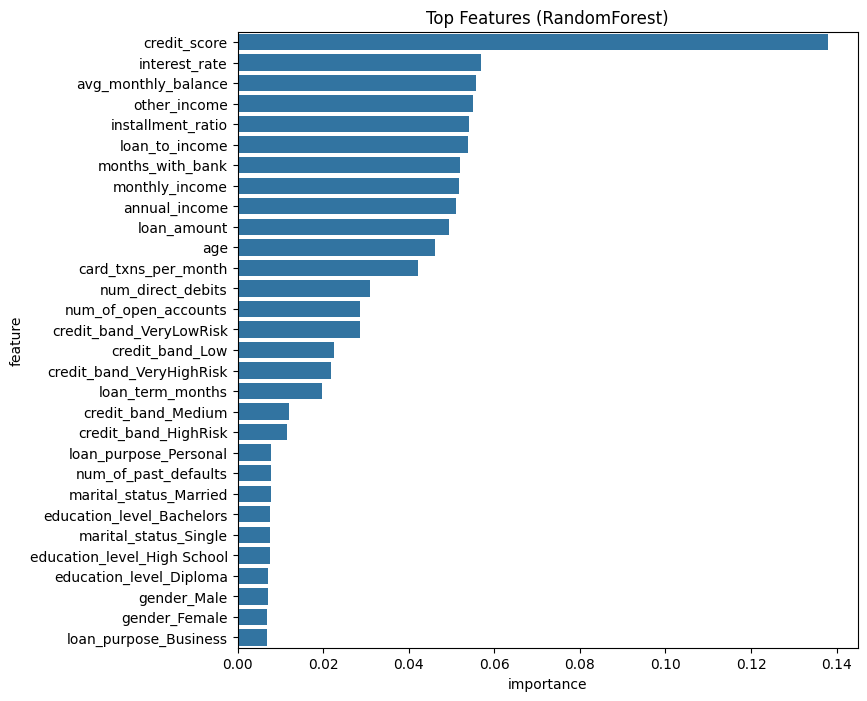

In [47]:
# ===============================
# 13. Optional: Feature importance (global)
# ===============================
# If you used rf2 for calibration, you can get feature importance after preprocessor transformation
# Re-fit rf2 so it exists
rf2 = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# Preprocess training data again (WITHOUT SMOTE)
preproc_X_train = preprocessor.fit_transform(X_train)

# Fit the RF model
rf2.fit(preproc_X_train, y_train)


importances = rf2.feature_importances_
feature_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_cols)))
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(30)
plt.figure(figsize=(8,8))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title("Top Features (RandomForest)")
plt.show()



---

## Notes & explanations (read before running)

- **Leakage**: I excluded `payment_delay_days` and `last_payment_date` because they would leak the label — you must simulate a real operation: predict at origination/approval. If your objective is “post-origination monitoring”, then different features and splitting should be used (and then `payment_delay_days` would be valid).
- **Time split**: Good practice for credit models — avoids training on future info. You can change `split_date`.
- **SMOTE**: used only on training data inside the `ImbPipeline`. It balances minority class for better learning. You could also use `class_weight='balanced'` as an alternative.
- **Calibration**: We used `CalibratedClassifierCV` on a fresh RF to get trustworthy PDs — banks care about calibrated probabilities.
- **PD→Score mapping**: The transformation is illustrative; in production you'd use a proper scorecard design (binning, logistic regression / WoE transforms).
- **Business metric**: Expected Loss = PD × LGD × EAD. I used outstanding_balance as EAD. Pick LGD appropriate to context (60% is common but adjust).
- **Targeted intervention**: The simulation assumes an intervention reduces PD by 30% for targeted customers; change % and target size to see sensitivity.
- **Performance tuning**: I used a straightforward RandomForest. You should do a randomized/grid search on `n_estimators`, `max_depth`, `min_samples_split`, etc., with cross-validation (time-based CV if possible).

---

If you want I can now:
- run a **RandomizedSearch** cell for RF hyperparameters (will increase runtime),  
- add **SHAP** explainability code for local explanations,  
- produce ready-to-paste **Streamlit** scoring app code using the `calib` model + `preprocessor` for a portfolio demo.

Which of those do you want next?


In [48]:
# ===============================
# Feature Importance Table
# ===============================

# Build DataFrame of all features + importances
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Show top 30 as a table
feat_imp_top30 = feat_imp_df.head(30)

feat_imp_top30


,feature,importance
7,credit_score,0.137981
2,interest_rate,0.056784
10,avg_monthly_balance,0.055614
6,other_income,0.055118
15,installment_ratio,0.054080
14,loan_to_income,0.053877
11,months_with_bank,0.051886
5,monthly_income,0.051794
4,annual_income,0.050943
0,loan_amount,0.049530


In [50]:
# Rebuild preprocessing (no SMOTE)
preproc_X_train = preprocessor.fit_transform(X_train)

# Fit RF for calibration
rf_uncalibrated = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    n_jobs=-1
)
rf_uncalibrated.fit(preproc_X_train, y_train)

# Calibrate
calib = CalibratedClassifierCV(
    estimator=rf_uncalibrated,
    method='isotonic',
    cv=5
)
calib.fit(preproc_X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,method,'isotonic'
,cv,5
,n_jobs,None
,ensemble,'auto'
,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [51]:
import joblib

final_model = {
    "preprocessor": preprocessor,
    "model": calib, 
    "feature_names": X_train.columns.tolist(),
    "model_version": "v1.0",
    "trained_on": "2025-12-14"
}

joblib.dump(final_model, "loan_default_model_v1.pkl")
print("Model exported successfully!")


Model exported successfully!
